In [1]:
import pandas as pd
import numpy as np
import math

# Loading Metadata and Waveforms

In [2]:
#Loading metadata
eq_meta = pd.read_csv('metadata/eq_meta.csv')
noise_meta = pd.read_csv('metadata/noise_meta.csv')

In [3]:
#Loading waveforms
eq_waveforms = pd.read_csv('waveforms/eq_waveforms_acc.csv')
noise_waveforms = pd.read_csv('waveforms/noise_waveforms_acc.csv')

In [4]:
print('Earthquake Metadata Shape = (' + str(eq_meta.shape[0]) + ',' + str(eq_meta.shape[1]) + ')')
print('Noise Metadata Shape = (' + str(noise_meta.shape[0]) + ',' + str(noise_meta.shape[1]) + ')')
print('Earthquake Waveforms Shape = (' + str(eq_waveforms.shape[0]) + ',' + str(eq_waveforms.shape[1]) + ')')
print('Noise Waveforms Shape = (' + str(noise_waveforms.shape[0]) + ',' + str(noise_waveforms.shape[1]) + ')')

Earthquake Metadata Shape = (200,35)
Noise Metadata Shape = (200,35)
Earthquake Waveforms Shape = (1188000,3)
Noise Waveforms Shape = (1200000,3)


<p>Each Earthquake and Noise corresponds to 6000 samples (60 secs * 100Hz Frequncy)</p>
<p>We have 198 Earthquakes and 200 Noise Waveforms</p>
<p>(198*6000) = 1,180,000 Samples for earthquake</p>
<p>(200*6000) = 1,200,000 Samples for noise</p>

In [5]:
eq_waveforms.head()

,x,y,z
0,7.458776e-11,-3.803954e-11,-3.994635e-10
1,2.104035e-10,1.069793e-10,-4.644220e-10
2,2.301925e-10,1.011196e-10,-4.678262e-10
3,4.019553e-10,8.202593e-11,-1.990608e-10
4,3.192288e-10,-1.724908e-10,-5.245854e-11


In [6]:
noise_waveforms.head()

,x,y,z
0,1.182854e-09,1.182854e-09,1.182854e-09
1,2.883696e-10,2.883696e-10,2.883696e-10
2,-1.036030e-09,-1.036030e-09,-1.036030e-09
3,-2.001298e-09,-2.001298e-09,-2.001298e-09
4,-2.127769e-09,-2.127769e-09,-2.127769e-09


In [7]:
#Adding label columns to the df
eq_waveforms['label'] = 'earthquake'
noise_waveforms['label'] = 'noise'

#Combining eq and noise dataframes
dataset = pd.DataFrame(columns = ['x', 'y', 'z', 'label'], data = eq_waveforms)
dataset = dataset.append(noise_waveforms, ignore_index = True)

In [8]:
dataset.head()

,x,y,z,label
0,7.458776e-11,-3.803954e-11,-3.994635e-10,earthquake
1,2.104035e-10,1.069793e-10,-4.644220e-10,earthquake
2,2.301925e-10,1.011196e-10,-4.678262e-10,earthquake
3,4.019553e-10,8.202593e-11,-1.990608e-10,earthquake
4,3.192288e-10,-1.724908e-10,-5.245854e-11,earthquake


In [9]:
dataset.tail()

,x,y,z,label
2387995,-9.575840e-11,-9.575840e-11,-9.575840e-11,noise
2387996,-1.045694e-10,-1.045694e-10,-1.045694e-10,noise
2387997,-4.178718e-11,-4.178718e-11,-4.178718e-11,noise
2387998,-5.187718e-11,-5.187718e-11,-5.187718e-11,noise
2387999,-5.341233e-11,-5.341233e-11,-5.341233e-11,noise


In [10]:
dataset.dtypes

x        float64
y        float64
z        float64
label     object
dtype: object

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()
#Changing categorical labels to encoded labels
dataset['label'] = label.fit_transform(dataset['label'])
dataset.head()

,x,y,z,label
0,7.458776e-11,-3.803954e-11,-3.994635e-10,0
1,2.104035e-10,1.069793e-10,-4.644220e-10,0
2,2.301925e-10,1.011196e-10,-4.678262e-10,0
3,4.019553e-10,8.202593e-11,-1.990608e-10,0
4,3.192288e-10,-1.724908e-10,-5.245854e-11,0


In [13]:
# earthquake is encoded as 0 and noise is encoded as 1
dataset.tail()

,x,y,z,label
2387995,-9.575840e-11,-9.575840e-11,-9.575840e-11,1
2387996,-1.045694e-10,-1.045694e-10,-1.045694e-10,1
2387997,-4.178718e-11,-4.178718e-11,-4.178718e-11,1
2387998,-5.187718e-11,-5.187718e-11,-5.187718e-11,1
2387999,-5.341233e-11,-5.341233e-11,-5.341233e-11,1


In [14]:
dataset.dtypes

x        float64
y        float64
z        float64
label      int32
dtype: object

In [15]:
label.classes_

array(['earthquake', 'noise'], dtype=object)

# Normalizing Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = dataset[['x', 'y', 'z']]
y = dataset['label']

In [18]:
X.head()

,x,y,z
0,7.458776e-11,-3.803954e-11,-3.994635e-10
1,2.104035e-10,1.069793e-10,-4.644220e-10
2,2.301925e-10,1.011196e-10,-4.678262e-10
3,4.019553e-10,8.202593e-11,-1.990608e-10
4,3.192288e-10,-1.724908e-10,-5.245854e-11


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [20]:
#Standardizing independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,2.024606e-08,4.412416e-08,2.827076e-07,0
1,5.544787e-08,8.669622e-08,2.601815e-07,0
2,6.057692e-08,8.497604e-08,2.590010e-07,0
3,1.050958e-07,7.937085e-08,3.522027e-07,0
4,8.365406e-08,4.654332e-09,4.030410e-07,0
...,...,...,...,...
2387995,-2.390562e-08,2.718008e-08,3.880256e-07,1
2387996,-2.618932e-08,2.459351e-08,3.849701e-07,1
2387997,-9.916930e-09,4.302400e-08,4.067415e-07,1
2387998,-1.253214e-08,4.006195e-08,4.032426e-07,1


# Frame Preparation

In [21]:
import scipy.stats as stats

In [22]:
frequency = 100
frame_size = frequency*60 # 6000 records for 60 secs
hop_size = frame_size # 6000 - No Overlapping occurs

In [23]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    
    for i in range(0, (len(df) - frame_size)+1, hop_size):
        x = df['x'].values[i: i + frame_size] # makes flat np array for x
        y = df['y'].values[i: i + frame_size] # makes flat np array for y
        z = df['z'].values[i: i + frame_size] # makes flat np array for z
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES) #1D Array for -1
    labels = np.asarray(labels)

    return frames, labels

In [24]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [25]:
#testFile = pd.read_csv('waveforms/test_data_acc.csv')

In [26]:
#validationX, validationY = get_frames(testFile, frame_size, hop_size)

In [27]:
#validationX.shape

In [28]:
y.shape

(398,)

In [29]:
X.shape

(398, 6000, 3)

In [30]:
unique, counts = np.unique(y, return_counts=True)

In [31]:
unique, counts

(array([0, 1]), array([198, 200], dtype=int64))

# 2D CNN for Classifying 'Earthquake' and 'Noise'


In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [33]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [298]:
X_train.shape, X_test.shape

((318, 6000, 3), (80, 6000, 3))

In [299]:
y_train.shape, y_test.shape

((318,), (80,))

In [300]:
# 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify = y_train)

In [301]:
X_train.shape, y_train.shape

((238, 6000, 3), (238,))

In [302]:
X_test.shape, y_test.shape

((80, 6000, 3), (80,))

In [303]:
X_val.shape, y_val.shape

((80, 6000, 3), (80,))

In [304]:
X_train[0].shape

(6000, 3)

In [305]:
X_train.shape[0]

238

In [306]:
X_test.shape[0]

80

In [307]:
X_train = X_train.reshape(X_train.shape[0], 6000, 3, 1)
X_test = X_test.reshape(X_test.shape[0], 6000, 3, 1)

In [308]:
X_train[0].shape, X_test[0].shape

((6000, 3, 1), (6000, 3, 1))

In [309]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(2, activation='softmax'))

In [310]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [311]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test, y_test), verbose=1)

Train on 238 samples, validate on 80 samples
Epoch 1/50
238/238 [==============================] - 2s 10ms/sample - loss: 0.6483 - accuracy: 0.5798 - val_loss: 0.6084 - val_accuracy: 0.6750
Epoch 2/50
238/238 [==============================] - 2s 8ms/sample - loss: 1.1713 - accuracy: 0.6849 - val_loss: 0.5940 - val_accuracy: 0.6375
Epoch 3/50
238/238 [==============================] - 2s 8ms/sample - loss: 0.6044 - accuracy: 0.6303 - val_loss: 0.5840 - val_accuracy: 0.6375
Epoch 4/50
238/238 [==============================] - 2s 8ms/sample - loss: 0.5562 - accuracy: 0.7101 - val_loss: 0.5807 - val_accuracy: 0.6500
Epoch 5/50
238/238 [==============================] - 2s 8ms/sample - loss: 0.5516 - accuracy: 0.6975 - val_loss: 0.5656 - val_accuracy: 0.8500
Epoch 6/50
238/238 [==============================] - 2s 8ms/sample - loss: 0.5388 - accuracy: 0.6681 - val_loss: 0.5431 - val_accuracy: 0.7875
Epoch 7/50
238/238 [==============================] - 2s 8ms/sample - loss: 0.4920 - accur

In [278]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

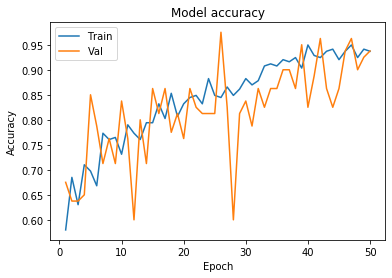

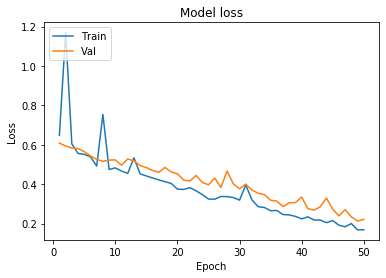

In [313]:
plot_learningCurve(history, 50)

In [280]:
X_test[0].shape

(6000, 3, 1)

In [314]:
prediction = model.predict_classes(X_val.reshape(X_val.shape[0],6000,3,1))

In [315]:
type(prediction)

numpy.ndarray

In [316]:
prediction

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [317]:
y_val

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

[[35  5]
 [ 0 40]]


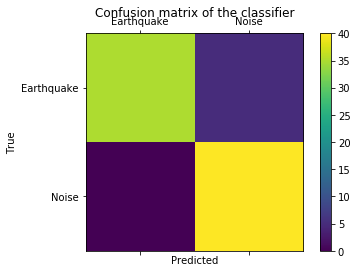

In [318]:
from sklearn.metrics import confusion_matrix

labels = ['Earthquake', 'Noise']
cm = confusion_matrix(y_true=y_val, y_pred=prediction, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
fig.cmap="OrRd"
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [147]:
cm = confusion_matrix(y_val, prediction)

In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.89      1.00      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



### Saving Model

In [170]:
model.save('models/cnn_5_13_20_16_56.h5')

In [151]:
import keras
from keras.models import load_model
pickled_cnn = tf.keras.models.load_model('models/cnn_5_12_20_15_01.h5')

Using TensorFlow backend.


In [220]:
pickled_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 5999, 2, 16)       80        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5999, 2, 16)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5998, 1, 32)       2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 5998, 1, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 191936)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                12283968  
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

# Practice

In [96]:
earthquake = X[0]

In [97]:
noise = X[250]

In [294]:
earthquake.shape

(6000, 3)

In [95]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, np.arange(0,6000), data[:,0], 'X-Axis')
    plot_axis(ax1, np.arange(0,6000), data[:,1], 'Y-Axis')
    plot_axis(ax2, np.arange(0,6000), data[:,2], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2) #vertical space between sub-plots
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90) #vertical space between plots and it's upper boundary 
    plt.show()
    #plt.savefig('plots/waveforms.png')

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False) # hides vcertical lines perpendicular to x-axis
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)]) #shrinks graph along y-axis
    ax.set_xlim([min(x), max(x)]) #shrinks graph along x-axis
    ax.grid(True) #display line grids

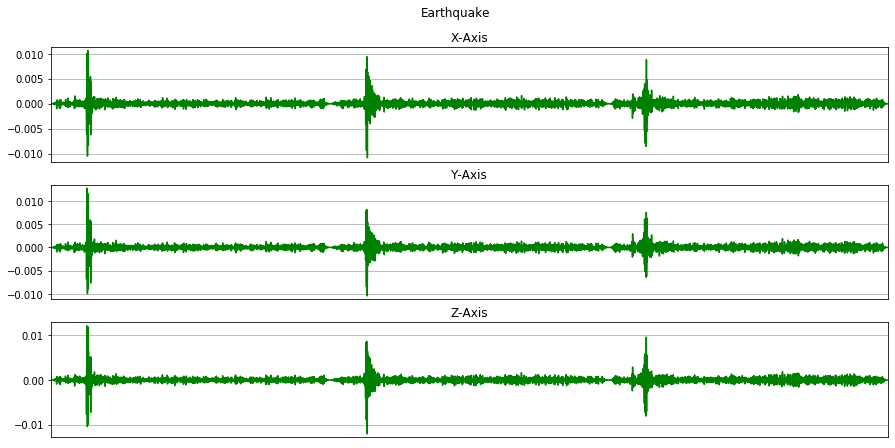

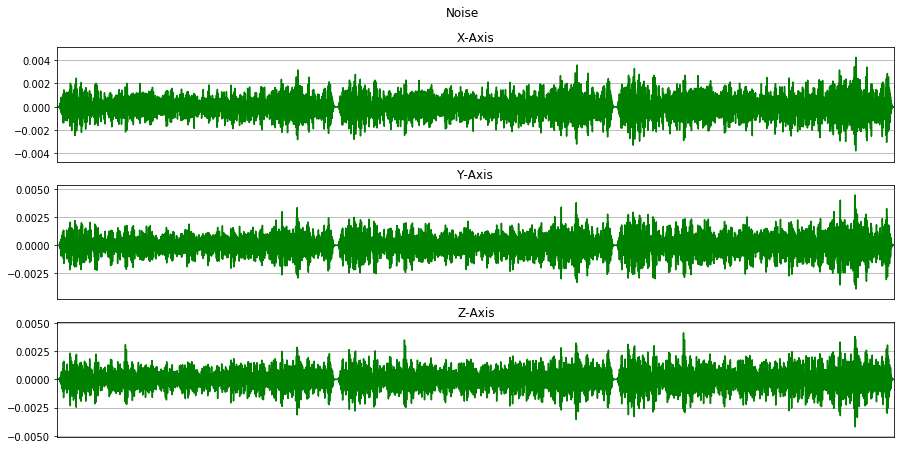

In [98]:
plot_activity('Earthquake', earthquake)
plot_activity('Noise', noise)